## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [32]:
import pandas as pd
df = pd.read_csv('cleaned_ecommerce_dataset.csv')

total_length = len(df)
print("Total Length of the DataFrame:", total_length)


Total Length of the DataFrame: 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [69]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('cleaned_ecommerce_dataset.csv')

In [70]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   userId  timestamp                                           review  \
0    4081      71900                                Not always McCrap   
1    4081      72000  I dropped the chalupa even before he told me to   
2    4081      72000                     The Wonderful World of Wendy   
3    4081     100399                             They actually did it   
4    4081     100399                             Hey! Gimme some pie!   

                                 item  rating  helpfulness gender  \
0                          McDonald's     4.0          3.0      M   
1                           Taco Bell     1.0          4.0      M   
2                             Wendy's     5.0          4.0      M   
3  South Park: Bigger, Longer & Uncut     5.0          3.0      M   
4                        American Pie     3.0          3.0      M   

                category  item_id  item_price  user_city  
0  Restaurants & Gourmet       41       30.74          4

In [71]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB
None


In [72]:
encoder = OrdinalEncoder()
df[['gender', 'category', 'review']] = encoder.fit_transform(df[['gender', 'category', 'review']])

In [73]:
correlations = df.corr()
rating_correlations = correlations['rating']

C:\Users\samra\AppData\Local\Temp\ipykernel_38660\2227068431.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


In [74]:
print("\nCorrelations with the rating:")
print(rating_correlations)


Correlations with the rating:
userId         0.032506
timestamp      0.000369
review        -0.036118
rating         1.000000
helpfulness   -0.007523
gender        -0.034337
category      -0.163158
item_id        0.042890
item_price     0.027374
user_city     -0.028825
Name: rating, dtype: float64


In [75]:
most_correlated_feature = rating_correlations.idxmax()
least_correlated_feature = rating_correlations.idxmin()

print("\nMost correlated feature with rating:", most_correlated_feature)
print("Least correlated feature with rating:", least_correlated_feature)


Most correlated feature with rating: rating
Least correlated feature with rating: category


In correlation analysis, a positive correlation indicates that the rating goes up as a feature goes up, while a negative correlation exemplifies the opposite. Therefore, the most correlated feature (the one with the highest correlation) is predicted to have the most significant effect on rating predictions. The least correlated feature (the feature with the lowest correlation) is projected to have relatively little effect.

For example, in a linear regression model, a feature with a high positive correlation to the rating is expected to significantly improve rating predictions as its values increase. A feature with a strong negative correlation is expected to significantly reduce predictions as its values rise. On the other hand, a feature with little or no correlation to the rating may have only a small effect on predictions because of its weak association to rating fluctuations.

To test these hypotheses, you can build and train your own regression model (e.g., linear regression), use the dataset, and evaluate the importance of every feature. The higher the importance score, the more significant the effect on the predictions.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [76]:
from sklearn.model_selection import train_test_split

train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=42)

In [77]:
train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=42)

In [89]:
print("Case 1 - Training Data Shape:", train_case1.shape)
print("Case 1 - Testing Data Shape:", test_case1.shape)
print("Case 2 - Training Data Shape:", train_case2.shape)
print("Case 2 - Testing Data Shape:", test_case2.shape)

Case 1 - Training Data Shape: (268, 11)
Case 1 - Testing Data Shape: (2417, 11)
Case 2 - Training Data Shape: (2416, 11)
Case 2 - Testing Data Shape: (269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [99]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [100]:
df = pd.read_csv('cleaned_ecommerce_dataset.csv')

encoder = OrdinalEncoder()
df[['gender', 'category', 'review']] = encoder.fit_transform(df[['gender', 'category', 'review']])

target_column = 'rating'
input_features = [col for col in df.columns if col != target_column]

In [101]:
train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=42)

train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=42)

most_correlated_features = ['userId', 'item_id']
least_correlated_features = ['gender', 'category']

In [140]:
def train_and_evaluate_model(train_data, test_data, features):
    X_train = train_data[features]
    y_train = train_data[target_column]
    X_test = test_data[features]
    y_test = test_data[target_column]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [141]:
mse_case1_model_a = train_and_evaluate_model(train_case1, test_case1, most_correlated_features)
mse_case1_model_b = train_and_evaluate_model(train_case1, test_case1, least_correlated_features)
mse_case2_model_c = train_and_evaluate_model(train_case2, test_case2, most_correlated_features)
mse_case2_model_d = train_and_evaluate_model(train_case2, test_case2, least_correlated_features)


In [142]:
print("MSE for Case 1 - Model A (Most Correlated Features):", mse_case1_model_a)
print("MSE for Case 1 - Model B (Least Correlated Features):", mse_case1_model_b)
print("MSE for Case 2 - Model C (Most Correlated Features):", mse_case2_model_c)
print("MSE for Case 2 - Model D (Least Correlated Features):", mse_case2_model_d)

MSE for Case 1 - Model A (Most Correlated Features): 1.8239709475945065
MSE for Case 1 - Model B (Least Correlated Features): 1.8076399168603041
MSE for Case 2 - Model C (Most Correlated Features): 1.7351102029789864
MSE for Case 2 - Model D (Least Correlated Features): 1.6762330042324514


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [143]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np



In [144]:
df = pd.read_csv('cleaned_ecommerce_dataset.csv')

encoder = OrdinalEncoder()
df[['gender', 'category', 'review']] = encoder.fit_transform(df[['gender', 'category', 'review']])

In [145]:
target_column = 'rating'
input_features = [col for col in df.columns if col != target_column]


In [146]:
train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=42)
train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=42)

In [147]:
most_correlated_features = ['userId', 'item_id']
least_correlated_features = ['gender', 'category']

In [148]:
def train_and_evaluate_model(train_data, test_data, features):
    X_train = train_data[features]
    y_train = train_data[target_column]
    X_test = test_data[features]
    y_test = test_data[target_column]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    rmse = np.sqrt(mse)

    return mse, rmse

In [149]:
mse_case1_model_a, rmse_case1_model_a = train_and_evaluate_model(train_case1, test_case1, most_correlated_features)
mse_case1_model_b, rmse_case1_model_b = train_and_evaluate_model(train_case1, test_case1, least_correlated_features)
mse_case2_model_c, rmse_case2_model_c = train_and_evaluate_model(train_case2, test_case2, most_correlated_features)
mse_case2_model_d, rmse_case2_model_d = train_and_evaluate_model(train_case2, test_case2, least_correlated_features)


In [150]:
print("Case 1 - Model A (Most Correlated Features):")
print("MSE:", mse_case1_model_a)
print("RMSE:", rmse_case1_model_a)
print("\nCase 1 - Model B (Least Correlated Features):")
print("MSE:", mse_case1_model_b)
print("RMSE:", rmse_case1_model_b)
print("\nCase 2 - Model C (Most Correlated Features):")
print("MSE:", mse_case2_model_c)
print("RMSE:", rmse_case2_model_c)
print("\nCase 2 - Model D (Least Correlated Features):")
print("MSE:", mse_case2_model_d)
print("RMSE:", rmse_case2_model_d)

Case 1 - Model A (Most Correlated Features):
MSE: 1.8239709475945065
RMSE: 1.3505446855230323

Case 1 - Model B (Least Correlated Features):
MSE: 1.8076399168603041
RMSE: 1.3444850006081526

Case 2 - Model C (Most Correlated Features):
MSE: 1.7351102029789864
RMSE: 1.3172358190464555

Case 2 - Model D (Least Correlated Features):
MSE: 1.6762330042324514
RMSE: 1.2946941740165712


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

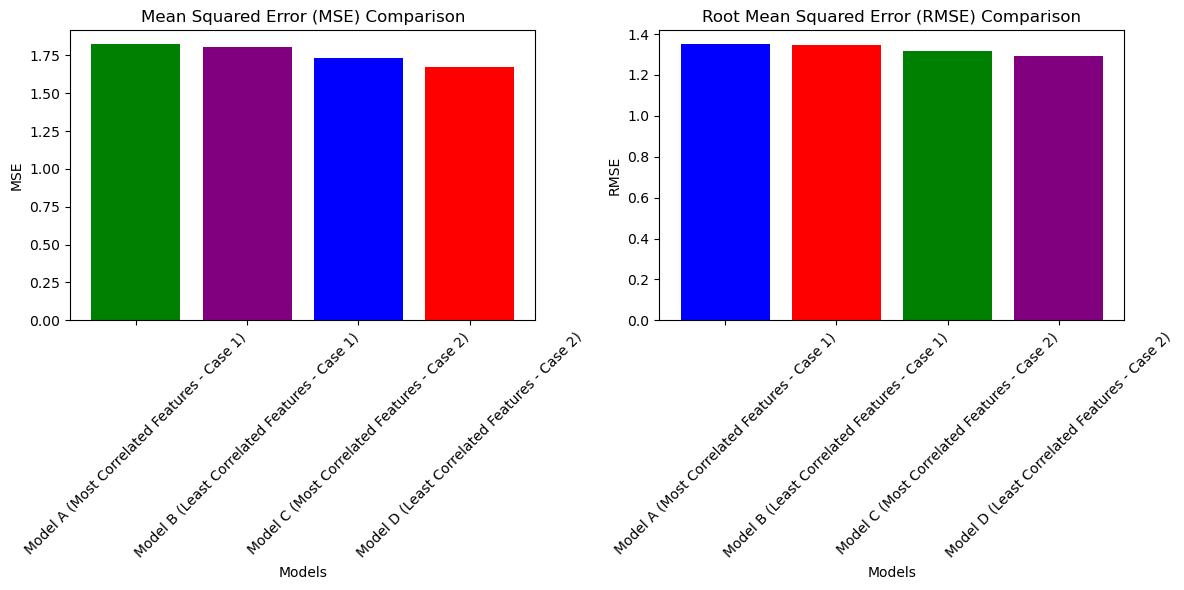

In [151]:
import matplotlib.pyplot as plt

models = ['Model A (Most Correlated Features - Case 1)',
          'Model B (Least Correlated Features - Case 1)',
          'Model C (Most Correlated Features - Case 2)',
          'Model D (Least Correlated Features - Case 2)']

mse_values = [mse_case1_model_a, mse_case1_model_b, mse_case2_model_c, mse_case2_model_d]
rmse_values = [rmse_case1_model_a, rmse_case1_model_b, rmse_case2_model_c, rmse_case2_model_d]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['green', 'purple', 'blue', 'red'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
plt.bar(models, rmse_values, color=['blue', 'red', 'green', 'purple'])
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Analysis:

The bar plots elucidates the performance of each model of MSE and RMSE. As Lower the values of MSE and RMSE are it exemplifies better model performance. Model A and C uses the most correlated features with a smaller training dataset of 10% of the data. It works pretty well, but the smaller dataset might limit how much it can generalize. Models B and D both use the least correlated features, but have higher MSEs and RMs, meaning they don't do as well as Model A. These observations show that selecting appropriate features and having training data is essential for constructing high-quality regression models.However, other factors, such as the complexity of the model may also influence the performance of the model. Additional testing and optimization may result in improved results.
